In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



In [44]:
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

import cv2
import numpy as np

# Load the image
image_path = 'the_berry_farms_sunflower_field.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
sigma = 1.0  # Adjust the value of sigma as needed
blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)

# Apply the Laplacian of Gaussian (LoG) filter
log_image = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the result to 8-bit unsigned integer format for visualization
log_image = np.uint8(np.absolute(log_image))

# Display the original image and the LoG filtered image
cv2.imshow('Original Image', image)
cv2.imshow('LoG Filtered Image', log_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()




In [ ]:
import cv2
import numpy as np

def scale_space_extrema_detection(image_path, num_octaves=4, num_scales=5, sigma=1.6, threshold=0.01):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    keypoints = []

    for octave in range(num_octaves):
        # Generate a sequence of scaled images for this octave
        octave_images = []
        for scale in range(num_scales):
            k_size = int(2 * np.ceil(3 * sigma) + 1)
            blurred_image = cv2.GaussianBlur(image, (k_size, k_size), sigma)
            log_image = cv2.Laplacian(blurred_image, cv2.CV_64F)
            log_image = np.uint8(np.absolute(log_image))
            
            # Find extrema in the current scale space
            for i in range(1, log_image.shape[0] - 1):
                for j in range(1, log_image.shape[1] - 1):
                    neighbors = log_image[i-1:i+2, j-1:j+2]
                    max_val = np.max(neighbors)
                    min_val = np.min(neighbors)
                    if log_image[i, j] == max_val or log_image[i, j] == min_val:
                        keypoints.append((i, j, octave, scale, sigma))

            sigma *= 2  # Double the sigma for the next scale

        # Resize the image for the next octave
        image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))

    # Display the original image with keypoints marked
    image_with_keypoints = cv2.imread(image_path)
    for keypoint in keypoints:
        i, j, octave, scale, sigma = keypoint
        x = j * (2 ** octave)
        y = i * (2 ** octave)
        cv2.circle(image_with_keypoints, (int(x), int(y)), 2, (0, 0, 255), -1)

    # Display the image with keypoints
    cv2.imshow('Scale-space Extrema Detection', image_with_keypoints)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return keypoints

# Example usage
image_path = 'the_berry_farms_sunflower_field.jpeg'
keypoints = scale_space_extrema_detection(image_path)
print(f"Number of keypoints detected: {len(keypoints)}")


75


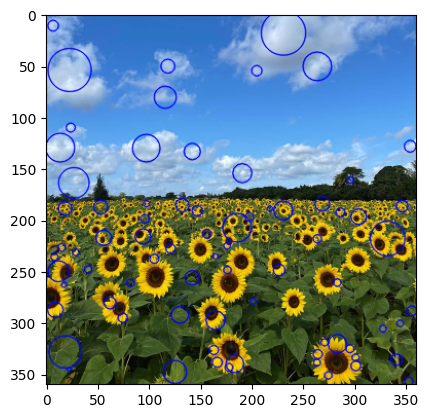

In [40]:
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)










#blob detection for different sigma values
params = cv.SimpleBlobDetector_Params()
params.filterByColor = True
params.blobColor = 255
params.filterByArea = True
params.minArea = 10
params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False
params.minDistBetweenBlobs = 1


# Set up the detector with default parameters.
detector = cv.SimpleBlobDetector_create(params)
# Detect blobs.
keypoints = detector.detect(im)
print(len(keypoints))
# Draw detected blobs as red circles.
# cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob
im_with_keypoints = cv.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints
plt.imshow(im_with_keypoints)
plt.show()






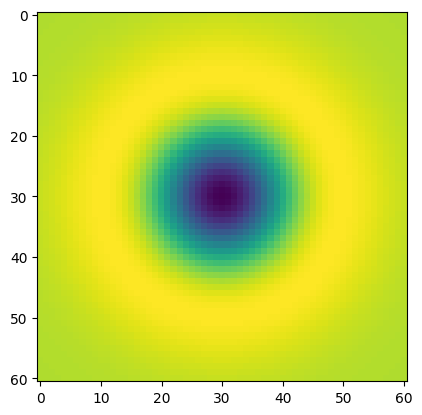

In [14]:
sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

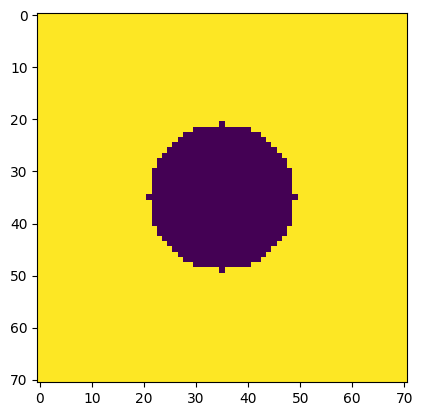

In [15]:
w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)

(35, 35, 5)
10


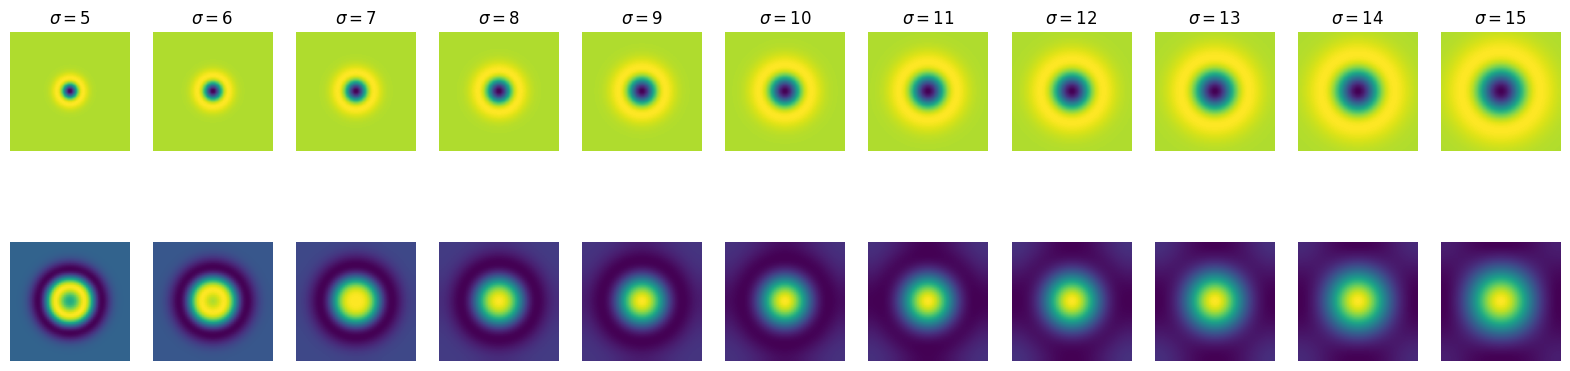

In [41]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
 
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])